In [2]:
import pymdp
from pymdp.agent import Agent
import numpy as np

from typing import List

In [17]:
obs = [4] # 00, 01, 10, 11
num_obs_modalities = len(obs)

hidden_states = [2, 2]
num_hidden_state_factors = len(hidden_states)

actions = [0, 1]
num_actions_0 = 2
num_actions_1 = 1 # I do not control the state of the other agent

num_controls = [2, 1]
num_control_factors = len(num_controls)

preferences = [100, -10, -10, 100000]

In [18]:
def generate_A(num_obs_modalities: int, obs: List[int], hidden_states: List[int]):
    
    A = pymdp.utils.obj_array(num_obs_modalities)
    A_0 = np.zeros( (obs[0], hidden_states[0], hidden_states[1]) )
    A_0[0, 0, 0] = 1
    A_0[1, 0, 1] = 1
    A_0[2, 1, 0] = 1
    A_0[3, 1, 1] = 1
    A[0] = A_0
    
    return A

def generate_B(hidden_states: List[int], num_controls: int):
    
    B = pymdp.utils.initialize_empty_B(hidden_states, num_controls)
    B_0 = np.zeros( (hidden_states[0], hidden_states[0], num_actions_0) )
    B_1 = np.zeros( (hidden_states[1], hidden_states[1], num_actions_1) )
    B[0][0, 0, 0] = 1
    B[0][0, 1, 0] = 1
    B[0][1, 0, 1] = 1
    B[0][1, 1, 1] = 1
    B[1][:, :, :] = 0.5
    
    return B

def generate_C(num_obs_modalities: int, preferences: List[int]):
    
    C = pymdp.utils.obj_array(num_obs_modalities)
    C_0 = np.array(preferences) # 00 and 11 have high preference
    C[0] = C_0
    
    return C

def generate_D(num_hidden_state_factors: int, self_state: List = [0, 1.0], opp_state: List = [0, 1.0]):
    
    D = pymdp.utils.obj_array(num_hidden_state_factors)
    D_0 = np.array(self_state)
    D_1 = np.array(opp_state)
    D[0] = D_0
    D[1] = D_1
    
    return D

In [19]:
def generate_agent(
        num_obs_modalities: int,
        num_hidden_state_factors: int,
        obs: List[int], 
        hidden_states: List[int],
        num_controls: int,
        preferences: List[int],
        self_state: List = [0, 1.0], 
        opp_state: List = [0, 1.0],
        policy_len: int = 2
    ):
    
    A = generate_A(num_obs_modalities, obs, hidden_states)
    B = generate_B(hidden_states, num_controls)
    C = generate_C(num_obs_modalities, preferences)
    D = generate_D(num_hidden_state_factors, self_state, opp_state)
    
    agent = Agent(A=A, B=B, C=C, D=D, num_controls=num_controls, policy_len=policy_len)
    
    return agent

In [20]:
agent_0 = generate_agent(num_obs_modalities, num_hidden_state_factors, obs, hidden_states, num_controls, preferences)

In [21]:
class SingleDeterministic():
    def __init__(self, init_state=[0, 1], fixed_policy=0):
        self.current_state = init_state
        self.init_state = init_state
        self.fixed_policy = fixed_policy
        self.obs = {"[0, 0]": [0], "[0, 1]": [1], "[1, 0]": [2], "[1, 1]": [3]}
        print(f"Starting at state {self.current_state}, fixed second agent with policy {self.fixed_policy}")

    def step(self, action):
        if action == 0:
            self.current_state = [0, self.fixed_policy]
        if action == 1:
            self.current_state = [1, self.fixed_policy]
        return self.obs[str(self.current_state)]

    def reset(self):
        self.current_state = self.init_state
        self.fixed_policy = self.fixed_policy
        print("Environment reset")
        return self.obs[str(self.current_state)]

env = SingleDeterministic(init_state=[1, 1], fixed_policy=1)

Starting at state [1, 1], fixed second agent with policy 1


Environment reset
Time: 0. Agent receives observation: [3]
belief: [array([1.e-32, 1.e+00]) array([1.e-32, 1.e+00])]


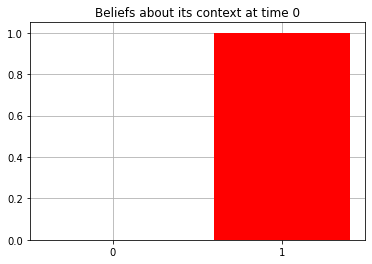

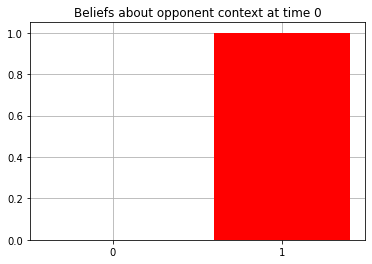

Agent chose action: [1. 0.]
New state: [1, 1]
Time: 1. Agent receives observation: [3]
belief: [array([1.00000037e-32, 1.00000000e+00]) array([1.e-16, 1.e+00])]


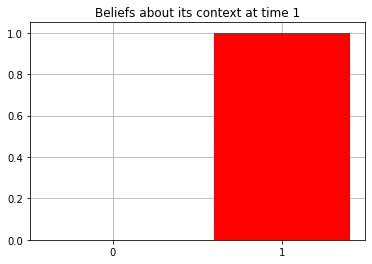

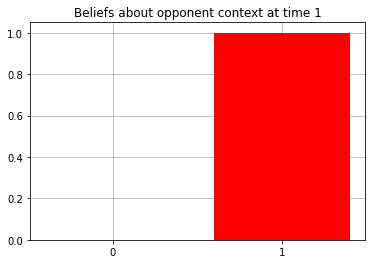

Agent chose action: [1. 0.]
New state: [1, 1]
Time: 2. Agent receives observation: [3]
belief: [array([1.00000037e-32, 1.00000000e+00]) array([1.e-16, 1.e+00])]


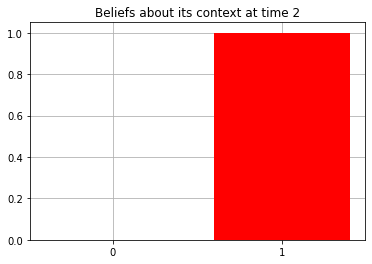

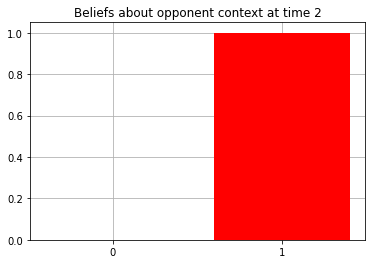

Agent chose action: [1. 0.]
New state: [1, 1]
Time: 3. Agent receives observation: [3]
belief: [array([1.00000037e-32, 1.00000000e+00]) array([1.e-16, 1.e+00])]


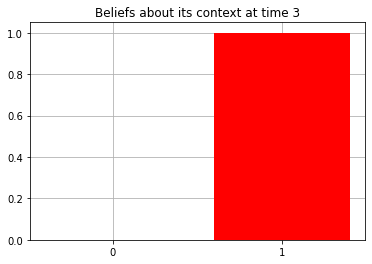

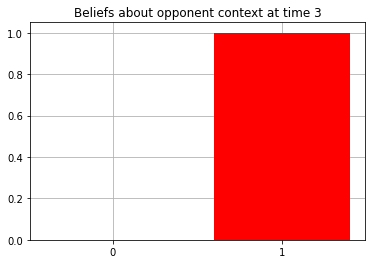

Agent chose action: [1. 0.]
New state: [1, 1]
Time: 4. Agent receives observation: [3]
belief: [array([1.00000037e-32, 1.00000000e+00]) array([1.e-16, 1.e+00])]


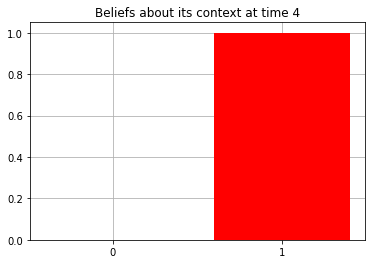

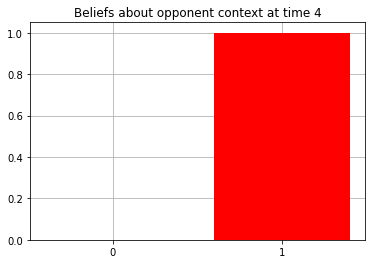

Agent chose action: [1. 0.]
New state: [1, 1]
Time: 5. Agent receives observation: [3]
belief: [array([1.00000037e-32, 1.00000000e+00]) array([1.e-16, 1.e+00])]


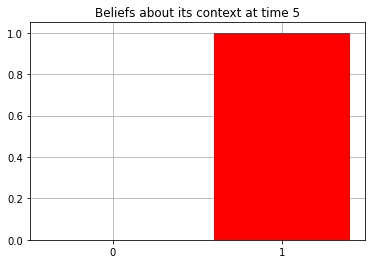

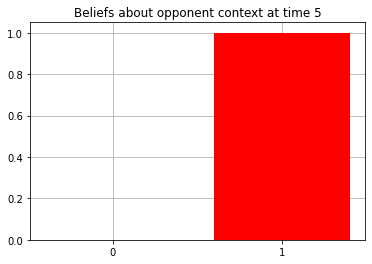

Agent chose action: [1. 0.]
New state: [1, 1]
Time: 6. Agent receives observation: [3]
belief: [array([1.00000037e-32, 1.00000000e+00]) array([1.e-16, 1.e+00])]


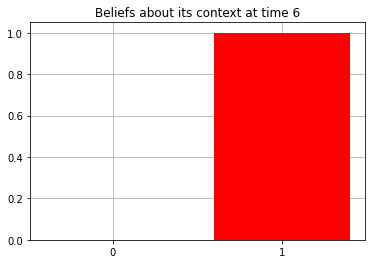

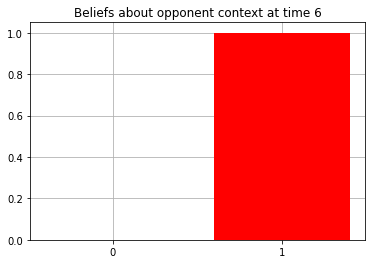

Agent chose action: [1. 0.]
New state: [1, 1]
Time: 7. Agent receives observation: [3]
belief: [array([1.00000037e-32, 1.00000000e+00]) array([1.e-16, 1.e+00])]


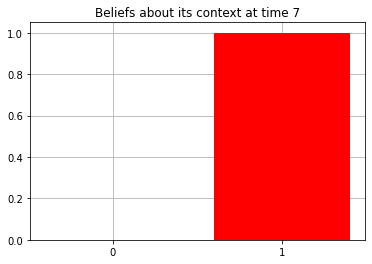

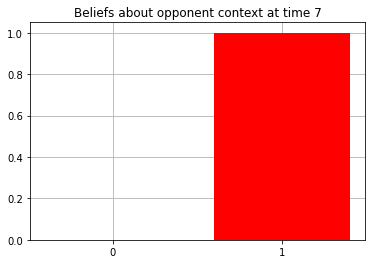

Agent chose action: [1. 0.]
New state: [1, 1]
Time: 8. Agent receives observation: [3]
belief: [array([1.00000037e-32, 1.00000000e+00]) array([1.e-16, 1.e+00])]


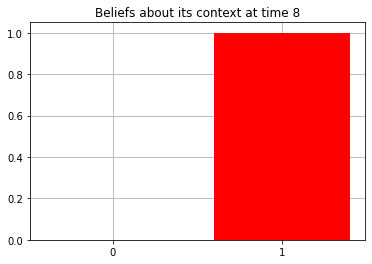

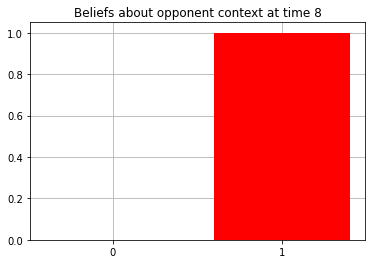

Agent chose action: [1. 0.]
New state: [1, 1]
Time: 9. Agent receives observation: [3]
belief: [array([1.00000037e-32, 1.00000000e+00]) array([1.e-16, 1.e+00])]


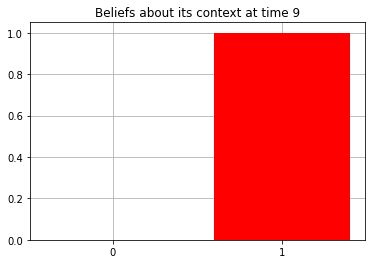

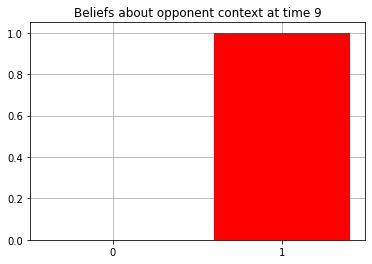

Agent chose action: [1. 0.]
New state: [1, 1]


In [22]:
from utils import plot_beliefs

def actinf_loop(agent, env, T=10):
    obs = env.reset()

    for t in range(T):
        print(f"Time: {t}. Agent receives observation: {obs}")
        qs = agent.infer_states(obs)
        print(f"belief: {qs}")
        plot_beliefs(qs[0], title_str = f"Beliefs about its context at time {t}")
        plot_beliefs(qs[1], title_str = f"Beliefs about opponent context at time {t}")
        q_pi, efe = agent.infer_policies()
        chosen_action = agent.sample_action()
        print(f"Agent chose action: {chosen_action}") 
        
        obs = env.step(chosen_action[0])
        print(f"New state: {env.current_state}")

actinf_loop(agent_0, env, 10)

# The double-agent case

In [ ]:
class DoubleEnv():
    def __init__(self, init_state=[0, 1]):
        self.current_state = init_state
        self.init_state = init_state
        self.agent1_policy = agent1_policy
        self.agent2_policy = agent2_policy
        self.obs = {"[0, 0]": [0], "[0, 1]": [1], "[1, 0]": [2], "[1, 1]": [3]}
        print(f"Starting at state {self.current_state}")
        if self.agent1_policy == 0:
            self.agent1_action = 0
        if self.agent1_policy == 1:
            self.agent1_action = 1
        if self.agent2_policy == 0:
            self.agent2_action = 0
        if self.agent2_policy == 1:
            self.agent2_action = 1

    def step(self, action1, action2):
        if action1 == 0:
            self.current_state[0] = self.agent1_action
        if action1 == 1:
            self.current_state[0] = self.agent1_action
        if action2 == 0:
            self.current_state[1] = self.agent2_action
        if action2 == 1:
            self.current_state[1] = self.agent2_action
        agent1_obs = self.obs[str(self.current_state)]
        agent2_obs = agent1_obs[::-1]  # Reverse the observation for agent2
        return agent1_obs, agent2_obs

    def reset(self):
        self.current_state = self.init_state
        self.agent1_policy = self.agent1_policy
        self.agent2_policy = self.agent2_policy
        print("Environment reset")
        agent1_obs = self.obs[str(self.current_state)]
        agent2_obs = agent1_obs[::-1]  # Reverse the observation for agent2
        return agent1_obs, agent2_obs
